In [1]:
import os
import numpy as np
import librosa 
print(librosa.__version__)
from scipy.io.wavfile import read
import IPython.display as ipd
import matplotlib.pyplot as plt
from diffwave.params import params
from tqdm import tqdm
import random
import torchaudio
import torch
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
sr = 16000

# load generator
model_dir = '/storage/ge/ckpts/diffwave128'
# params['residual_channels'] = 64

0.9.1


In [13]:
from diffwave.model import DiffWave
from diffwave.params import AttrDict, params as base_params

#     
#     noise_scale = torch.from_numpy(alpha_cum**0.5).float().unsqueeze(1).to(device)

#     for n in range(len(alpha)-1, -1, -1):
#       c1 = 1 / alpha[n]**0.5
#       c2 = beta[n] / (1 - alpha_cum[n])**0.5
#       audio = c1 * (audio - c2 * model(audio, torch.tensor([T[n]], device=audio.device)).squeeze(1))
#       if n > 0:
#         noise = torch.randn_like(audio)
#         sigma = ((1.0 - alpha_cum[n-1]) / (1.0 - alpha_cum[n]) * beta[n])**0.5
#         audio += sigma * noise
#       audio = torch.clamp(audio, -1.0, 1.0)
#   return audio, model.params.sample_rate

In [14]:
vocalGen = predict(model_dir=model_dir, device=torch.device('cuda'), 
                   params=params, fast_sampling=False)

In [11]:
ipd.display(ipd.Audio(vocalGen.cpu().numpy(), rate=sr))

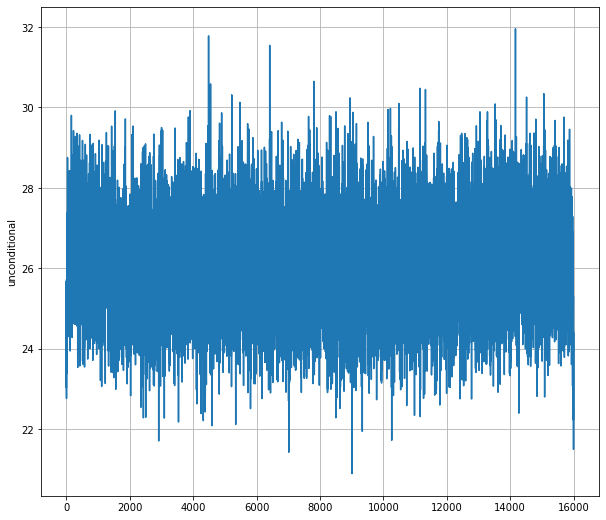

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(10, 9))
axs.plot(vocalGen[0].cpu().numpy())
axs.set_ylabel('unconditional')
axs.grid(True)